https://towardsdatascience.com/a-quick-introduction-to-cmip6-e017127a49d3

In [1]:
import intake


url = "https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"
datastore = intake.open_esm_datastore(url)

In [2]:
datastore.df.columns

Index(['activity_id', 'institution_id', 'source_id', 'experiment_id',
       'member_id', 'table_id', 'variable_id', 'grid_label', 'zstore',
       'dcpp_init_year'],
      dtype='object')

In [3]:
models = datastore.search(
    experiment_id="historical",
    table_id="Amon",
    variable_id="tas",
    institution_id="NCAR",
    member_id="r11i1p1f1"
)

models

,unique
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,1
table_id,1
variable_id,1
grid_label,1
zstore,1
dcpp_init_year,0


In [4]:
datasets = models.to_dataset_dict()
datasets.keys()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


dict_keys(['CMIP.NCAR.CESM2.historical.Amon.gn'])

In [5]:
ds = datasets["CMIP.NCAR.CESM2.historical.Amon.gn"]

ds

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, member_id: 1, nbnd: 2, time: 1980)
Coordinates:
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * member_id  (member_id) <U9 'r11i1p1f1'
Dimensions without coordinates: nbnd
Data variables:
    tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    674885.0
    branch_time_in_parent:   219000.0
    case_id:                 972
    cesm_casename:           b.e21.BHIST.f09_g17.CMIP6-historical.011
    contact:                 cesm_cmip6@ucar.edu
    creation_date:           2019-04-02T03:42:21Z
    data_specs_version:      01.00.29
    experiment:              Simulation of recent past (1850 to 2014). Impose...
    experiment_id:           historical
    external_variables:      areacella
    forcing_index:           1
    frequency:               mon
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2....
    grid:                    native 0.9x1.25 finite volume grid (192x288 latx...
    grid_label:              gn
    history:                 2019-03-30T03:00:36Z ; CMOR rewrote data to be c...
    initialization_index:    1
    institution:             National Center for Atmospheric Research, Climat...
    institution_id:          NCAR
    license:                 CMIP6 model data produced by <The National Cente...
    mip_era:                 CMIP6
    model_doi_url:           https://doi.org/10.5065/D67H1H0V
    nominal_resolution:      100 km
    parent_activity_id:      CMIP
    parent_experiment_id:    piControl
    parent_mip_era:          CMIP6
    parent_source_id:        CESM2
    parent_time_units:       days since 0001-01-01 00:00:00
    parent_variant_label:    r1i1p1f1
    physics_index:           1
    product:                 model-output
    realization_index:       11
    realm:                   atmos
    source:                  CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite ...
    source_id:               CESM2
    source_type:             AOGCM BGC
    sub_experiment:          none
    sub_experiment_id:       none
    table_id:                Amon
    tracking_id:             hdl:21.14100/a7278f6d-6a1b-4050-8f06-a8033604736...
    variable_id:             tas
    variant_info:            CMIP6 20th century experiments (1850-2014) with ...
    variant_label:           r11i1p1f1
    status:                  2019-10-25;created;by nhn2@columbia.edu
    intake_esm_varname:      tas
    intake_esm_dataset_key:  CMIP.NCAR.CESM2.historical.Amon.gn

In [6]:
first_step = ds.isel(time=0)

first_step.load()

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, member_id: 1, nbnd: 2)
Coordinates:
    lat_bnds   (lat, nbnd) float64 -90.0 -89.53 -89.53 ... 89.53 89.53 90.0
    lon_bnds   (lon, nbnd) float64 -0.625 0.625 0.625 ... 358.1 358.1 359.4
    time_bnds  (nbnd) object 1850-01-01 00:00:00 1850-02-01 00:00:00
    time       object 1850-01-15 12:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * member_id  (member_id) <U9 'r11i1p1f1'
Dimensions without coordinates: nbnd
Data variables:
    tas        (member_id, lat, lon) float32 242.14903 242.14903 ... 241.94131
Attributes:
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    674885.0
    branch_time_in_parent:   219000.0
    case_id:                 972
    cesm_casename:           b.e21.BHIST.f09_g17.CMIP6-historical.011
    contact:                 cesm_cmip6@ucar.edu
    creation_date:           2019-04-02T03:42:21Z
    data_specs_version:      01.00.29
    experiment:              Simulation of recent past (1850 to 2014). Impose...
    experiment_id:           historical
    external_variables:      areacella
    forcing_index:           1
    frequency:               mon
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2....
    grid:                    native 0.9x1.25 finite volume grid (192x288 latx...
    grid_label:              gn
    history:                 2019-03-30T03:00:36Z ; CMOR rewrote data to be c...
    initialization_index:    1
    institution:             National Center for Atmospheric Research, Climat...
    institution_id:          NCAR
    license:                 CMIP6 model data produced by <The National Cente...
    mip_era:                 CMIP6
    model_doi_url:           https://doi.org/10.5065/D67H1H0V
    nominal_resolution:      100 km
    parent_activity_id:      CMIP
    parent_experiment_id:    piControl
    parent_mip_era:          CMIP6
    parent_source_id:        CESM2
    parent_time_units:       days since 0001-01-01 00:00:00
    parent_variant_label:    r1i1p1f1
    physics_index:           1
    product:                 model-output
    realization_index:       11
    realm:                   atmos
    source:                  CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite ...
    source_id:               CESM2
    source_type:             AOGCM BGC
    sub_experiment:          none
    sub_experiment_id:       none
    table_id:                Amon
    tracking_id:             hdl:21.14100/a7278f6d-6a1b-4050-8f06-a8033604736...
    variable_id:             tas
    variant_info:            CMIP6 20th century experiments (1850-2014) with ...
    variant_label:           r11i1p1f1
    status:                  2019-10-25;created;by nhn2@columbia.edu
    intake_esm_varname:      tas
    intake_esm_dataset_key:  CMIP.NCAR.CESM2.historical.Amon.gn

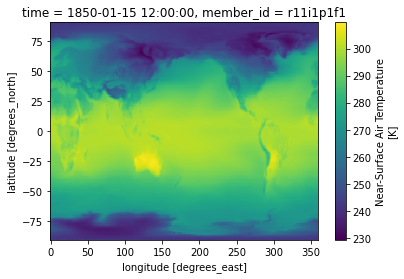

In [7]:
first_step["tas"].plot();